<a href="https://colab.research.google.com/github/AftabQuant/Deep-Learning/blob/main/AlexNet_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
from keras import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.regularizers import L2
from keras.utils import image_dataset_from_directory
from keras.callbacks import EarlyStopping

In [3]:
zip_ref = zipfile.ZipFile("/content/archive.zip", 'r')
zip_ref.extractall('my_data')
zip_ref.close()

In [4]:
train_ds = image_dataset_from_directory(
    "/content/my_data/train",
    image_size=(227, 227),
    batch_size=32,
    label_mode='binary',
)

Found 20000 files belonging to 2 classes.


In [5]:
test_ds = image_dataset_from_directory(
    "/content/my_data/test",
    batch_size=32,
    image_size=(227, 227),
    label_mode='binary',
)

Found 5000 files belonging to 2 classes.


In [6]:
def processing(image, label):
  image = tf.cast(image/255.0, tf.float32)
  return image, label

train_ds = train_ds.map(processing)
test_ds = test_ds.map(processing)

In [7]:
def create_model():
  model = Sequential()

  # Layer 1
  model.add(Conv2D(filters=96, kernel_size=(11,11), activation="relu", input_shape = (227, 227, 3), strides=(4,4)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

  # Layer 2
  model.add(Conv2D(256, (5,5), padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(3,3), strides=(2, 2)))

  # Layer 3
  model.add(Conv2D(384, (3,3), padding = "same",activation="relu"))

  # Layer 4
  model.add(Conv2D(384, (3,3), padding = "same",activation="relu"))

  # Layer 5
  model.add(Conv2D(256, (3,3), padding = "same",activation="relu"))
  model.add(MaxPool2D(pool_size=(3,3), strides=(2, 2)))

  # Flatten
  model.add(Flatten())

  # FC Layer 1
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))

  # FC Layer 2
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))

  # Output Layer
  model.add(Dense(1, activation='sigmoid'))

  # Compile the model
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  return model

In [8]:
model = create_model()

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 55, 55, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 27, 27, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,286,849 (222.35 MB)

 Trainable params: 58,286,145 (222.34 MB)

 Non-trainable params: 704 (2.75 KB)

In [10]:
history = model.fit(train_ds, epochs=50, validation_data=test_ds, callbacks=EarlyStopping(patience=6))

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 64ms/step - accuracy: 0.5013 - loss: 2.1368 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 61ms/step - accuracy: 0.4974 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.5047 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.4987 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.5025 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.5017 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.4954 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.4991 - loss: 0.6932 - 

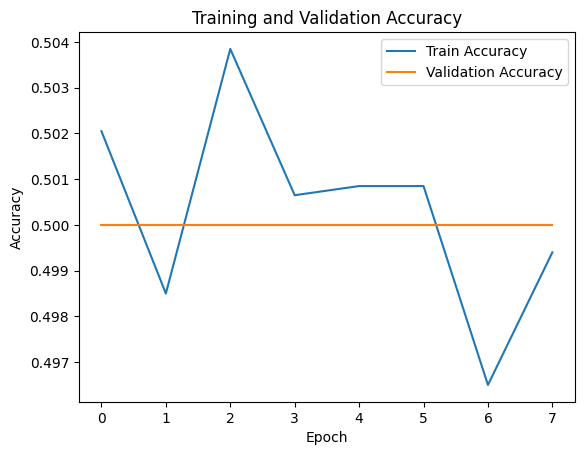

In [11]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

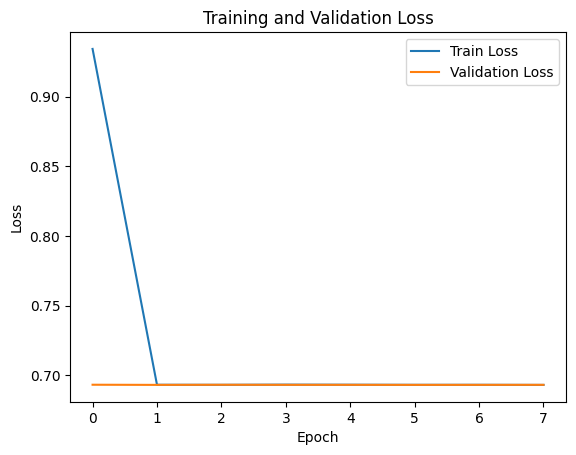

In [14]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()